# Build Your Own Audio Processing Package Using [Poetry](https://python-poetry.org/)

This notebook will show what type of functionality we will build in our very own package. 

As you read along this notebook, explore the resources provided and think about what kind of functionality you would like to add to the package. 

## Package Functionality Covered in the Workshop

### 1. Load Audio via...
- [Scipy](https://docs.scipy.org/doc/scipy/reference/)
- [Librosa](https://librosa.org/doc/latest/index.html)
- [Parselmouth](https://parselmouth.readthedocs.io/en/stable/)
- [Torchaudio](https://pytorch.org/audio/stable/index.html)

Each of these audio processing libraries offer a plethera of tools used in development, research, and/or deep learning.

### 2. Repeat Audio `x` Times

It is just fun to play with audio. 

### 3. Change Speaker Pitch

[Praat](https://www.fon.hum.uva.nl/praat/) is beloved by many speech researches across the globe. Parselmouth allows us to use Praat in a pythonic way. For reliable measurements of speech related features and speech manipulation, I would explore this library further.

### 4. Visualize Audio

To see what our audio looks like, in both the [time domain](https://en.wikipedia.org/wiki/Discrete_time_and_continuous_time) and [frequency domain](https://en.wikipedia.org/wiki/Frequency_domain), we will use [Matplotlib](https://matplotlib.org/) in our package. This should give us an idea of what all neural networks need to learn from audio and perhaps why audio is quite challenging for machines to handle. 

I will use [this paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9034048) as an example to explore commonly used audio features. 

Note: many advancements are being made in the field of acoustic neural networks, such as using [transformer models](https://arxiv.org/pdf/2006.11477.pdf); however this exceeds the scope of this workshop.

In [2]:
import groovin_pyladies as groovin

In [3]:
from IPython.display import Audio, display

In [4]:
speech_path = "../../data/audio/python.wav"
alarm_path = "../../data/audio/alarm.wav"

# Load Audio

In [5]:
samples, sampling_rate = groovin.load_audio(
    alarm_path,
    package = "librosa"
)

## Warning: check your volume!!

In [6]:
Audio(samples, rate=sampling_rate)

# Repeat Alarm

In [6]:
samples_repeated = groovin.manipulate.repeat(
    samples,
    repeat_n_times=2
)

In [8]:
import numpy as np
samples_mirrored = np.concatenate([samples, np.flip(samples)])

In [9]:
samples_mirrored_repeated = groovin.manipulate.repeat(
    samples_mirrored,
    repeat_n_times=2
)

# Manipulate Speaker Pitch

In [11]:
speech_object = groovin.load_audio(
    speech_path,
    package = "praat"
)

In [12]:
type(speech_object)

parselmouth.Sound

In [14]:
speech_low = groovin.manipulate.pitch(
    speech_object,
    factor = 3/4,
)

In [16]:
speech_high = groovin.manipulate.pitch(
    speech_object,
    factor = 3/2,
)

# Visualize Audio 

We will use [this paper](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9034048) (pages 54667-54668) as a reference for our visuals.

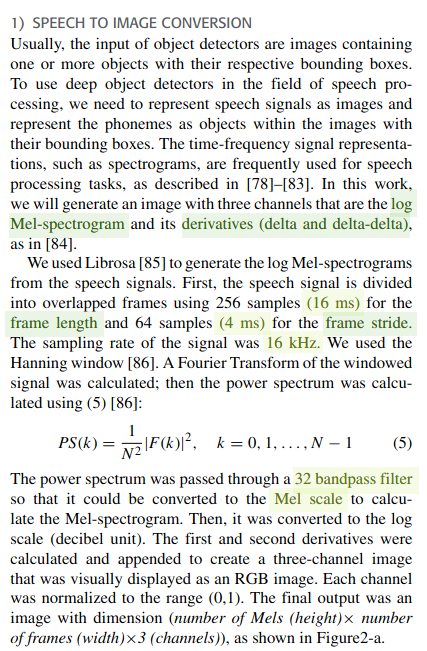

In [18]:
from IPython.display import Image
Image(filename='../../data/example_features_librosa.png') 

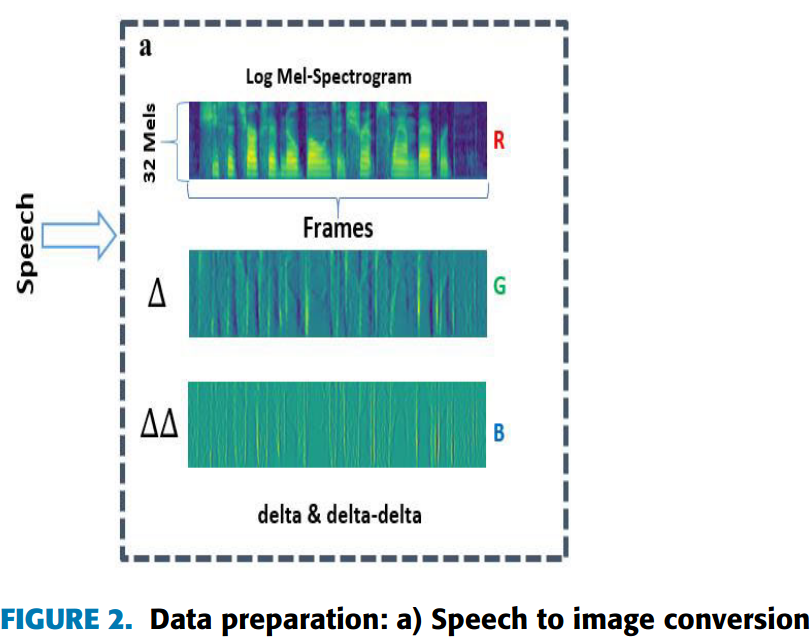

In [19]:
Image(filename='../../data/example_features_librosa_graph.png') 

## Assign variables from paper

In [20]:
sampling_rate_new = 16000
frame_length_ms = 16
hop_length_ms = frame_length_ms // 4
n_mel_filters = 32

In [21]:
int(sampling_rate_new * frame_length_ms * 0.001)

256

In [22]:
int(sampling_rate_new * hop_length_ms * 0.001)

64

## Adjust our data accordingly

I have not included resampling into our package.

In [23]:
import librosa

In [24]:
speech_low_resampled = librosa.resample(
    speech_low.values[0],
    speech_low.sampling_frequency,
    sampling_rate_new
)

In [25]:
speech_high_resampled = librosa.resample(
    speech_high.values[0],
    speech_high.sampling_frequency,
    sampling_rate_new
)

### Look at the lower speech:

We can fiddle around with the settings and see how they influence the figure.

In [26]:
fbank_low = groovin.mel_specgram(
    speech_low_resampled,
    sr = sampling_rate_new,
    n_mels = n_mel_filters,
    win_length = int(sampling_rate_new * frame_length_ms * 0.001),
    hop_length = int(sampling_rate_new * hop_length_ms * 0.001),
)

Using Librosa..


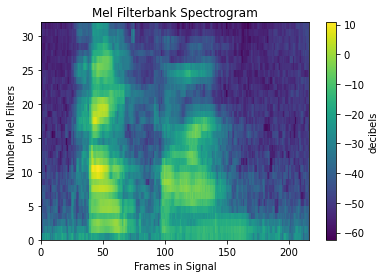

In [27]:
groovin.plot.visualize_fbank(fbank_low)

### Look at the higher speech:

Can you see a difference?

In [28]:
fbank_high = groovin.mel_specgram(
    speech_high_resampled,
    sr = sampling_rate_new,
    n_mels = n_mel_filters,
    win_length = int(sampling_rate_new * frame_length_ms * 0.001),
    hop_length = int(sampling_rate_new * hop_length_ms * 0.001),
)

Using Librosa..


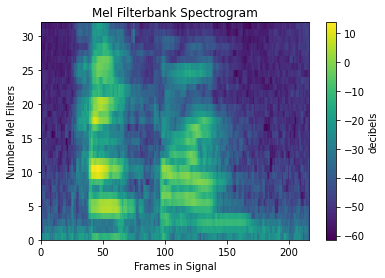

In [29]:
groovin.plot.visualize_fbank(fbank_high)

### Look at Delta Features

For more info on what the delta features are for, see this [post](https://wiki.aalto.fi/display/ITSP/Deltas+and+Delta-deltas).

Note: I have not incorporated this into our package. 

In [30]:
fbank_low_delta = librosa.feature.delta(
    fbank_low,
    order=1,
)

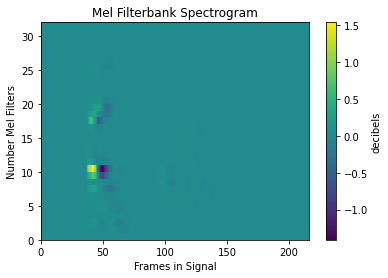

In [31]:
groovin.plot.visualize_fbank(fbank_low_delta, convert_to_decibel=False)

In [32]:
fbank_low_delta_delta = librosa.feature.delta(
    fbank_low,
    order=2,
)

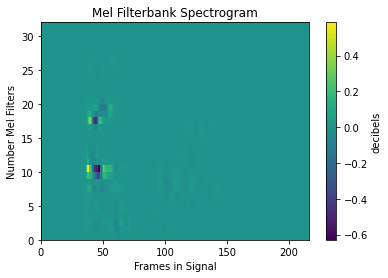

In [33]:
groovin.plot.visualize_fbank(fbank_low_delta_delta, convert_to_decibel=False)

# We can do the same with Torchaudio as well!

In [34]:
speech_torch, sr_torch = groovin.load_audio(
    speech_path,
    package = "torchaudio"
)

In [35]:
type(speech_torch)

torch.Tensor

In [36]:
speech_torch

tensor([[0.0035, 0.0015, 0.0024,  ..., 0.0003, 0.0016, 0.0035]])

### For more on tensors, see this Medium series on deep learning [tensors](https://medium.com/secure-and-private-ai-writing-challenge/introduction-to-tensors-1-de7dded35fea).

In [37]:
sr_torch

44100

#### To match the variables of the paper, we have to resample. 

I did not include resampling functionality in our package.

In [38]:
import torchaudio

In [39]:
resample_torch = torchaudio.transforms.Resample(
    orig_freq=sr_torch,new_freq=sampling_rate_new
)

In [40]:
speech_torch_resampled = resample_torch(speech_torch)

In [41]:
fbank_low_torch = groovin.mel_specgram(
    speech_torch_resampled,
    sample_rate = sampling_rate_new,
    n_mels = n_mel_filters,
    win_length = int(sampling_rate_new * frame_length_ms * 0.001),
    hop_length = int(sampling_rate_new * hop_length_ms * 0.001),
)

Using PyTorch..


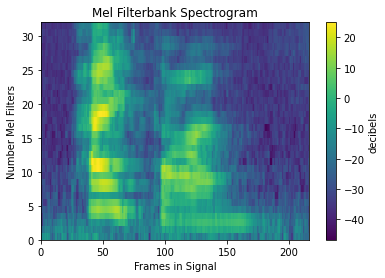

In [42]:
groovin.plot.visualize_fbank(fbank_low_torch[0])

# What I hope people gain from this workshop:

- practice building your own package
- feel more familiar and comfortable working with audio
- provide context and interactive experience with audio in contexts of deep learning and research

## What are you interested in exploring?

This workshop is aimed to spark your interest and increase your familiarity with the world of audio and deep learning. There are so many directions you can go from here. 

### Questions to offer direction: 
- Are you interested in real-time audio processing, such as speech enhancement during live conversation? 
- Or are you more interested in applications less reliant on speed, such as classifying collected data? 
- Do you want to work with speech or rather general sound and noise? 
- How is the audio data that you are interested in collected? Via telephone or via high quality microphones?
- Do you want to work with single channel audio or multi-channel audio?

# About Aislyn Rose

### Background
- [Website](https://a-n-rose.github.io/)
- B.A. Psychology ([Goucher College](https://www.goucher.edu/))
- M.Sc. Clinical Linguistics ([EMCL](https://www.emcl.eu/))
- Software Developer: [Prototypefund](https://prototypefund.de/en/) Round [5](https://prototypefund.de/en/projects/round-5/) Project \\\NoIze// 
- Software Developer: [EXIST](https://www.exist.de/DE/Home/inhalt.html) team [Aureka.ai](https://aureka.ai/en/)

### Interests

- How brains and machines process acoustic information
- Tool development for fun and utility in realm of sound processing

### Current job: Software Developer for Aureka.ai

My responsibilities include:

- organize and preprocess audio datasets for deep learning tasks
- finetune and implement state of the art machine learning models for acoustic processing tasks
- integrate packages utilizing models into the backend software environment

I am learning a lot.